In [8]:
import pandas as pd

# Load cleaned datasets
benin_df = pd.read_csv(r"C:\Users\hp\PyCharmMiscProject\solar-challenge-week1\data\benin_clean.csv")
sierra_leone_df = pd.read_csv(r"C:\Users\hp\PyCharmMiscProject\solar-challenge-week1\data\sierra_clean.csv")
togo_df = pd.read_csv(r"C:\Users\hp\PyCharmMiscProject\solar-challenge-week1\data\togo_clean.csv")

# Add a column to label data by country
benin_df["Country"] = "Benin"
sierra_leone_df["Country"] = "Sierra Leone"
togo_df["Country"] = "Togo"

# Combine datasets into a single DataFrame
combined_df = pd.concat([benin_df, sierra_leone_df, togo_df], ignore_index=True)

# Quick examination
print(combined_df.head())


          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments Country  
0       NaN   Benin  
1       NaN   Benin  
2       NaN   Benin  
3       NaN   Be

Metric comparison

C:\Users\hp\AppData\Local\Temp\ipykernel_27692\3381249850.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=combined_df, palette="viridis")


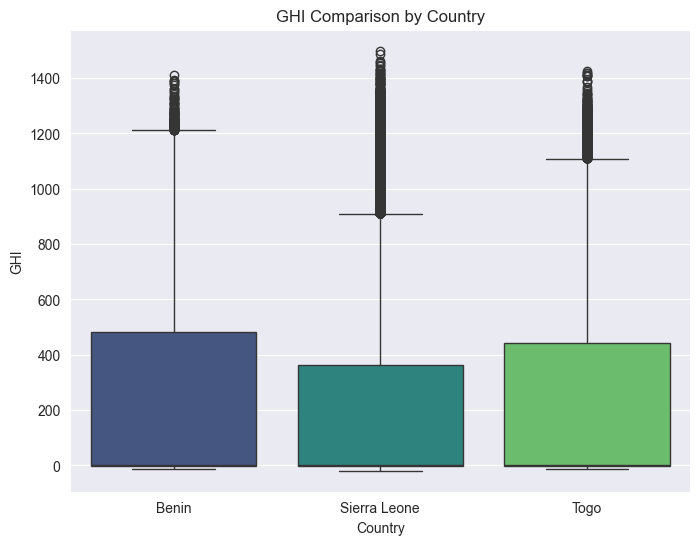

C:\Users\hp\AppData\Local\Temp\ipykernel_27692\3381249850.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=combined_df, palette="viridis")


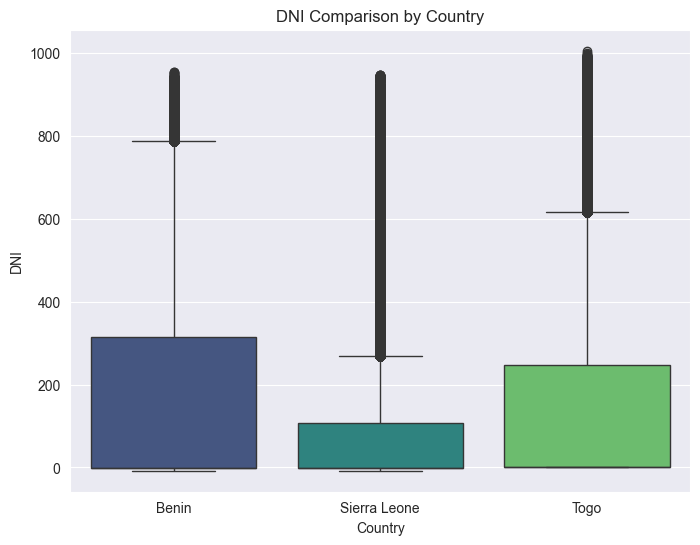

C:\Users\hp\AppData\Local\Temp\ipykernel_27692\3381249850.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=combined_df, palette="viridis")


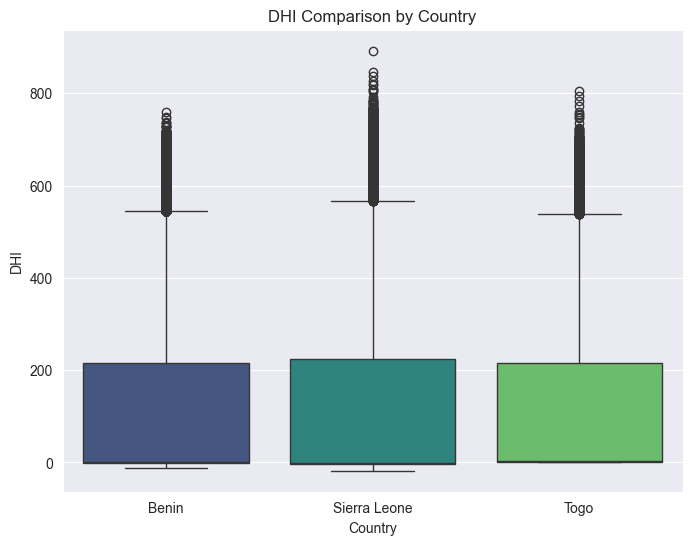

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot GHI, DNI, DHI as separate boxplots
metrics = ["GHI", "DNI", "DHI"]
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Country", y=metric, data=combined_df, palette="viridis")
    plt.title(f"{metric} Comparison by Country")
    plt.xlabel("Country")
    plt.ylabel(metric)
    plt.show()

Summary table

In [12]:
# Summary statistics: mean, median, and standard deviation by country
summary_stats = combined_df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])
print(summary_stats)

# Optional: Pretty display with pandas
from tabulate import tabulate
print(tabulate(summary_stats, headers="keys", tablefmt="pretty"))

                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714  
+--------------+--------------------+-------------------+-------------------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+
|   Country    |  ('GHI', 'mean')   | ('GHI', 'median

In [11]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ANOVA for GHI

In [13]:
from scipy.stats import f_oneway

# Run ANOVA test
anova_result = f_oneway(
    benin_df["GHI"].dropna(),
    sierra_leone_df["GHI"].dropna(),
    togo_df["GHI"].dropna()
)

print("ANOVA Test Results:")
print(f"F-statistic: {anova_result.statistic:.2f}, P-value: {anova_result.pvalue:.3f}")

ANOVA Test Results:
F-statistic: 2090.09, P-value: 0.000


Kruskal-wallis test

In [14]:
from scipy.stats import kruskal

# Run Kruskal-Wallis test
kruskal_result = kruskal(
    benin_df["GHI"].dropna(),
    sierra_leone_df["GHI"].dropna(),
    togo_df["GHI"].dropna()
)

print("Kruskal-Wallis Test Results:")
print(f"H-statistic: {kruskal_result.statistic:.2f}, P-value: {kruskal_result.pvalue:.3f}")

Kruskal-Wallis Test Results:
H-statistic: 4524.88, P-value: 0.000


Visual Summary

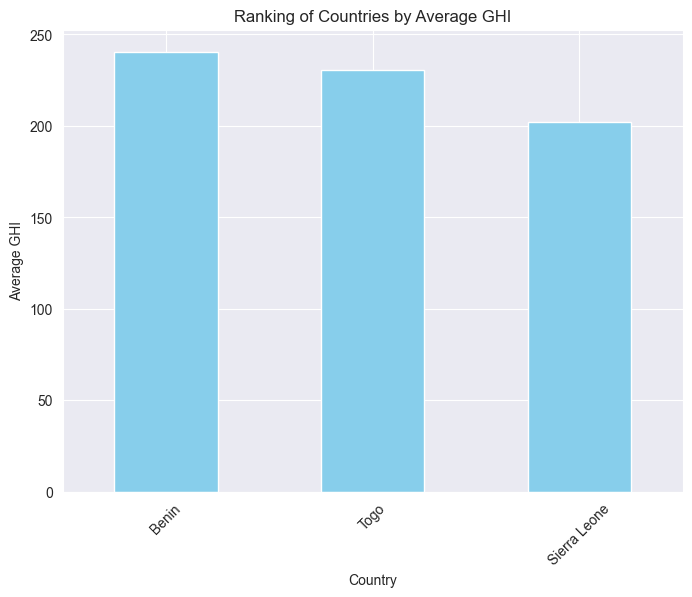

In [15]:
# Average GHI ranking
average_ghi = combined_df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(8, 6))
average_ghi.plot(kind="bar", color="skyblue")
plt.title("Ranking of Countries by Average GHI")
plt.xlabel("Country")
plt.ylabel("Average GHI")
plt.xticks(rotation=45)
plt.show()